# Scipy : high-level scientific computing

<div align='center'><img src='./images/alcho-meter.gif' width='45%'/></div>

Quick recap of what we have covered so far:

- Python Fundamentals
    - Conditional Flow and Loops
    - Defining Functions
- Beyond Base Python
    - Importing Modules
    - Numpy
    - Matplotlib
- Advanced Python
    - Classes, Attributes, Methods
    - List Comprehension

We also covered a few special topics including 

- Differential Equations
- Numerical Calculus 
- Random Numbers/ Monte Carlo

In todays class we are going to start the final chapter in our explorations of scientific computing with python

As we have already seen there is a large diverse set of packages available to tackle a wide variety of problems. Today we are going to take a deep dive into one ...

**Note**:
Many notes and examples from today come from the [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html) website which is full of great explanations and tutorials 

## Scipy

<div align='center'><img src='./images/scipy.png' /></div>

The scipy package contains various toolboxes dedicated to common issues in scientific computing. 

Its different submodules correspond to different applications, such as 

- interpolation
- integration
- optimization 
- image processing
- statistics
- special functions

and more!

Scipy can be compared to other standard scientific-computing libraries, such as the GSL (GNU Scientific Library for C and C++), or Matlab's toolboxes. 

Scipy is the core package for scientific routines in Python

It is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.

Before implementing a routine, it is worth checking if the desired data processing is not already implemented in Scipy. 

As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. 

By contrast, Scipy's routines are optimized and tested, and should therefore be used when possible.

Scipy is a very large module which has been broken down into sub-modules. [Check out the docs!](https://docs.scipy.org/doc/scipy/reference/)

Our goal for this week is to explore:

- Statistics (scipy.stats)
- Interpolation (scipy.interpolate)
- Linear Algebra (scipy.linalg)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)

## Interpolation (scipy.interpolate)

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions. 

`scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

The `interp1d` function, when given arrays describing X and Y data, returns and object that behaves like a function that can be called for an arbitrary value of x (in the range covered by X), and it returns the corresponding interpolated y value

Lets see a quick example. Suppose you have some data which you would like to interpolate. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
time = np.linspace(0, 1, 10)
measures = np.array([ 0.07400971,  0.55055939,  0.97729201,  
                     0.79949394,  0.42167574,  -0.4276238 , 
                     -0.895968  , -1.07955724, -0.56764597, 
                     0.05896949])

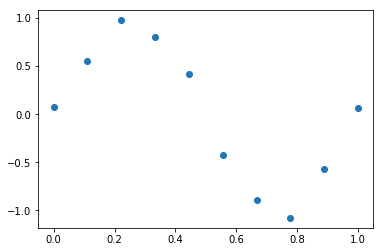

In [3]:
plt.plot(time, measures, 'o')

Now we will pass our X and Y values to the `interp1d` functions which returns a function like object

In [4]:
linear_results = interpolate.interp1d(time, measures)

In [5]:
linear_results(0.2)

array(0.89194549)

In [6]:
linear_results(0.5)

array(-0.00297403)

Because this behaves just like a function we can plot it like any other function

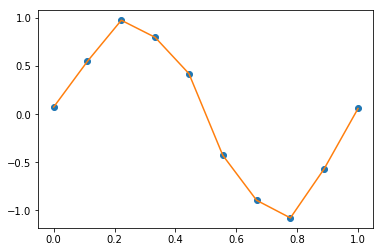

In [7]:
x = np.linspace(time.min(), time.max(), 100)
plt.plot(time, measures, 'o')
plt.plot(x, linear_results(x))

There are other kinds of interpolation instead of linear such as 'cubic' or 'quadratic'. These can be produced by passing an extra keyword, `kind`, to the `interp1d` function

In [8]:
cubic_results = interpolate.interp1d(time, measures, kind='cubic')

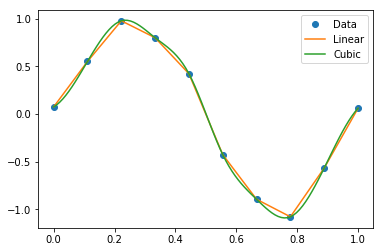

In [9]:
x = np.linspace(time.min(), time.max(), 100)
plt.plot(time, measures, 'o', label='Data')
plt.plot(x, linear_results(x), label='Linear')
plt.plot(x, cubic_results(x), label='Cubic')
plt.legend()

`interp2d` is similar to `interp1d`, but for 2-D arrays. 

Note that for the _interp_ family, the interpolation points must stay within the range of given data points.

## Exercise

Below is the data from homework 2 question 3. Use `interp1d` to interpolate the data with a linear and quadratic fit. Plot them all together like above. 

In [10]:
xn = np.array([0.        , 0.62831853, 
              1.25663706, 1.88495559, 
              2.51327412, 3.14159265, 
              3.76991118, 4.39822972, 
              5.02654825, 5.65486678,
              6.28318531])

yn = np.array([0.            ,  5.87785252e-01,  
              9.51056516e-01,  9.51056516e-01, 
              5.87785252e-01,  1.22464680e-16, 
              -5.87785252e-01, -9.51056516e-01,
              -9.51056516e-01, -5.87785252e-01, 
              -2.44929360e-16])

## Statistics

The `scipy.stats` module contains a large number of statistical distributions, statistical functions and tests.

[See the docs for a quick reference](https://docs.scipy.org/doc/scipy/reference/stats.html)

## Normal Distribution

We will start by exploring the Normal distribution. 

$$
 \mathcal{N}(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}
$$

All statistical distribution objects in `scipy.stats` package contain useful methods. The `norm` class has:

- `pdf(x)` to calculate the Probability density function at x.
- `cdf(x)` to calculate the Cumulative distribution function at x.
- `interval(alpha)` to calculate the endpoints of the range that contains alpha percent of the distribution
- `rvs(size)` to generate random variates of abitrary size.
- `fit(data)` to estimate the parameters for generic data.

and many more

The `stats.norm` class by default creates a standard normal distribution with mean 0 and standard deviation of 1. 

In [11]:
from scipy import stats

dist = stats.norm()

print(dist.mean())
print(dist.std())

0.0
1.0


Let's plot the PDF

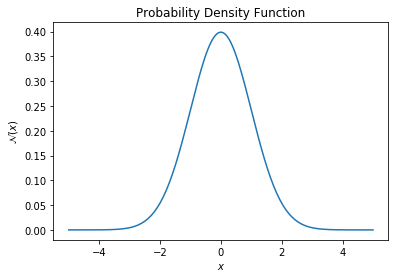

In [12]:
fig, ax = plt.subplots()

x = np.linspace(-5, 5, 200)

ax.plot(x, dist.pdf(x))
ax.set(title='Probability Density Function',
           xlabel='$x$', 
           ylabel='$\mathcal{N}(x)$');

### Location and Shape Parameteres

We can pass to the distribution object a parameter `loc` which controls the mean and `scale` which controls the standard deviation. Lets create a variety of distributions by varying these paramerters

In [13]:
parameters = np.array([
            [0,  0.2],
            [0,  1.0],
            [0,  5.0], 
            [-2, 0.5]])
parameters

array([[ 0. ,  0.2],
       [ 0. ,  1. ],
       [ 0. ,  5. ],
       [-2. ,  0.5]])

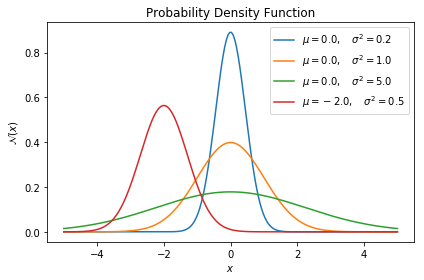

In [14]:
fig, ax = plt.subplots()

for mean, var in parameters:
    
    dist = stats.norm(loc=mean, scale=np.sqrt(var))
    
    ax.plot(x, dist.pdf(x), 
            label = f'$\mu = {mean},\quad \sigma^2 = {var}$')
    ax.set(title='Probability Density Function',
       xlabel='$x$', 
       ylabel='$\mathcal{N}(x)$')
    ax.legend()
    
plt.tight_layout()

### Random Variate Samples

To sample a distribution the `rvs` method is used. For reproducibility I will set the `random_state`. 

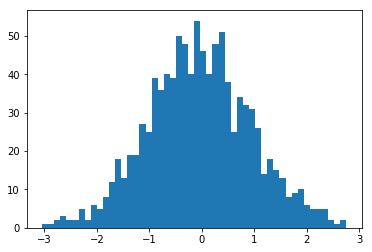

In [15]:
dist = stats.norm()
samples = dist.rvs(1000, random_state=0)

plt.hist(samples, bins=50);

### Parameter Fitting

Often we are interested in fitting the parameters of a distribution to data we have collected. 

Lets generate some data first. 

In [16]:
data = stats.norm.rvs(loc=5, scale=3, size=1000, random_state=42)
data[:5]

array([6.49014246, 4.5852071 , 6.94306561, 9.56908957, 4.29753988])

The `fit` method returns the shape parameters that best fit the given data

In [17]:
mu, std = stats.norm.fit(data)
print(f'Best fit mean: \t{mu}')
print(f'Best fit std: \t{std}')

Best fit mean: 	5.0579961674669764
Best fit std: 	2.9361786232420632


We can use these values to overlay the fitted distribution onto a normalised histogram of the data

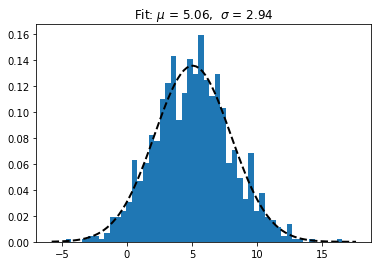

In [18]:
# Plotting the histogram of the data
plt.hist(data, bins=50, density=True)

# Plotting the PDF of the fitted distribuiton
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
fitted_dist = stats.norm(mu, std)

plt.plot(x, fitted_dist.pdf(x), 'k--', linewidth=2)
plt.title(f"Fit: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}");

## Other Distributions

There are many different distributions we can choose from such as the Chi Squared distribution. 

$$
P(x) = {\frac {1}{2^{k/2}\Gamma (k/2)}}\;x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}
$$

Often it can be useful to vary a shape parameter and see how it affects the distribution.

Text(0.5,1,'$\\chi^2_k$ for k degrees of freedom')

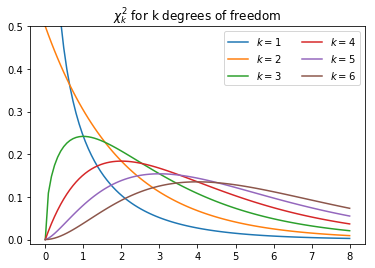

In [19]:
x = np.linspace(0, 8, 100)
for i in range(1, 7):
    dist = stats.chi2(i)
    plt.plot(x, dist.pdf(x), label=f'$k={i}$')
    plt.ylim(-.01, 0.5)
    plt.legend(ncol=2)

plt.title('$\chi^2_k$ for k degrees of freedom')

## Exercise:

- Generate 1000 random variates from a gamma distribution with a shape parameter of 2

- plot a histogram from those samples. 

- Plot the pdf on top

- Recover the shape parameter by using the fit method on your random variates

## Linear Algebra

The linear algebra module contains a lot of matrix related functions, including:

- linear equation solving
- eigenvalue solvers
- matrix functions (for example matrix-exponentiation)
- a number of different decompositions (SVD, LU, cholesky), etc. 

Detailed documetation is available at: http://docs.scipy.org/doc/scipy/reference/linalg.html

### Linear equation systems

Linear equation systems of the matrix form

$$A x = b$$

where $A$ is a matrix and $x,b$ are vectors can be solved using `scipy.linalg`

In [20]:
from scipy import linalg

In [21]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [22]:
x = linalg.solve(A, b)
x

/Users/eitanlees/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.541976e-18
  """Entry point for launching an IPython kernel.


array([-0.33333333,  0.66666667,  0.        ])

We can check if our solution is correct by rearranging the linear system 

$$A x  - b = 0$$

In [23]:
A.dot(x) - b

array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

We can also do the same with

$$A X = B$$

where $A, B, X$ are matrices:

In [24]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [25]:
X = linalg.solve(A, B)

In [26]:
X

array([[-0.24746407,  0.37718171, -1.31790916],
       [ 0.58906037,  0.97534124,  1.84687891],
       [ 0.27466407, -0.02203056, -0.26405915]])

In [27]:
# check
linalg.norm(A.dot(X) - B)

7.850462293418876e-17

### Eigenvalues and eigenvectors

The eigenvalue problem for a matrix $A$:

$$A v_n = \lambda_n v_n$$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` and for calculating both eigenvalues and eigenvectors, use the function `eig`

In [28]:
evals = linalg.eigvals(A)

In [29]:
evals

array([-0.42427939+0.j,  1.23617757+0.j,  0.4426028 +0.j])

In [30]:
evals, evecs = linalg.eig(A)

In [31]:
evals

array([-0.42427939+0.j,  1.23617757+0.j,  0.4426028 +0.j])

In [32]:
evecs

array([[ 0.81951636, -0.74140709,  0.68253409],
       [-0.09571547, -0.17714038, -0.6183478 ],
       [-0.56500574, -0.64725328,  0.38960648]])

The eigenvectors corresponding to the $n$th eigenvalue (stored in `evals[n]`) is the $n$th *column* in `evecs`, i.e., `evecs[:,n]`. 

To verify this, let's try mutiplying eigenvectors with the matrix and compare to the product of the eigenvector and the eigenvalue

$$A v_n - \lambda_n v_n = 0$$

In [33]:
n = 1

linalg.norm(A.dot(evecs[:,n]) - evals[n] * evecs[:,n])

4.652682298944613e-16

### Matrix operations

In [34]:
# the matrix inverse
linalg.inv(A)

array([[-0.88297548, -1.91686518,  2.46264686],
       [ 0.15488151,  2.09651079, -0.52979274],
       [ 1.2347069 , -0.37710082, -0.50216536]])

In [35]:
# determinant
linalg.det(A)

-0.23213838152716487

In [36]:
# norms of various orders
linalg.norm(A, ord=2)

1.4312980478879416

In [37]:
linalg.norm(A, ord=np.Inf)

1.6925799631725584